
UNDERSTAND THE PROBLEM STATEMENT


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
%pip uninstall pexpect ipython
%pip install pexpect ipython

Found existing installation: pexpect 4.8.0
Uninstalling pexpect-4.8.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pexpect-4.8.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pexpect/*
Proceed (Y/n)? 

In [ ]:
%pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file
#insurance_df = pd.read_csv('insurance.csv')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
insurance_df= pd.read_csv(path)

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS:

<Axes: >

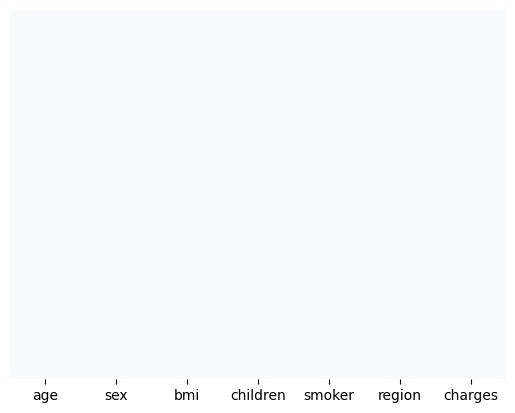

In [9]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


>There are no null values

In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Grouping by region to see any relationship between region and charges
df_region = insurance_df.groupby(by ='region').mean()
df_region


>The southeast region has the highest charges and body mass index

In [11]:
#Group data by 'age' and examine the relationship between 'age' and 'charges'
df_age = insurance_df.groupby(by ='age').mean()
df_age

<ipython-input-11-92bb794283cb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = insurance_df.groupby(by ='age').mean()


,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [12]:
df_age.corr()

,bmi,children,charges
bmi,1.000000,-0.133242,0.589047
children,-0.133242,1.000000,-0.095280
charges,0.589047,-0.095280,1.000000


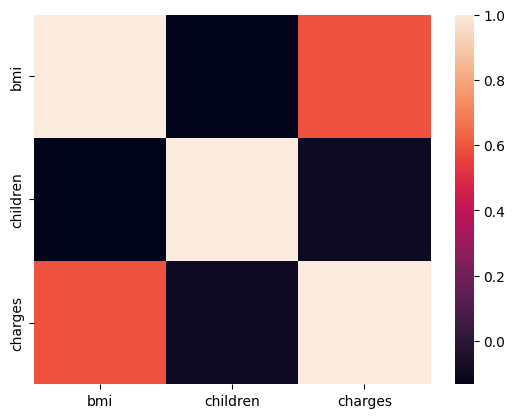

In [13]:
# Compute correlations between columns
corr = df_age.corr()
# Create a heatmap
sns.heatmap(corr)
# Show the plot
plt.show()

In [14]:
# convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [16]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
# Convert categorical variable to numerical

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [18]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [21]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [22]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [23]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [24]:
# Let's drop the original 'region' column
insurance_df.drop(['region'], axis = 1, inplace = True)


In [25]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [26]:
#Calculate the mean and standard deviation of the age, charges and bmi
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


# TASK #4: VISUALIZE DATASET

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

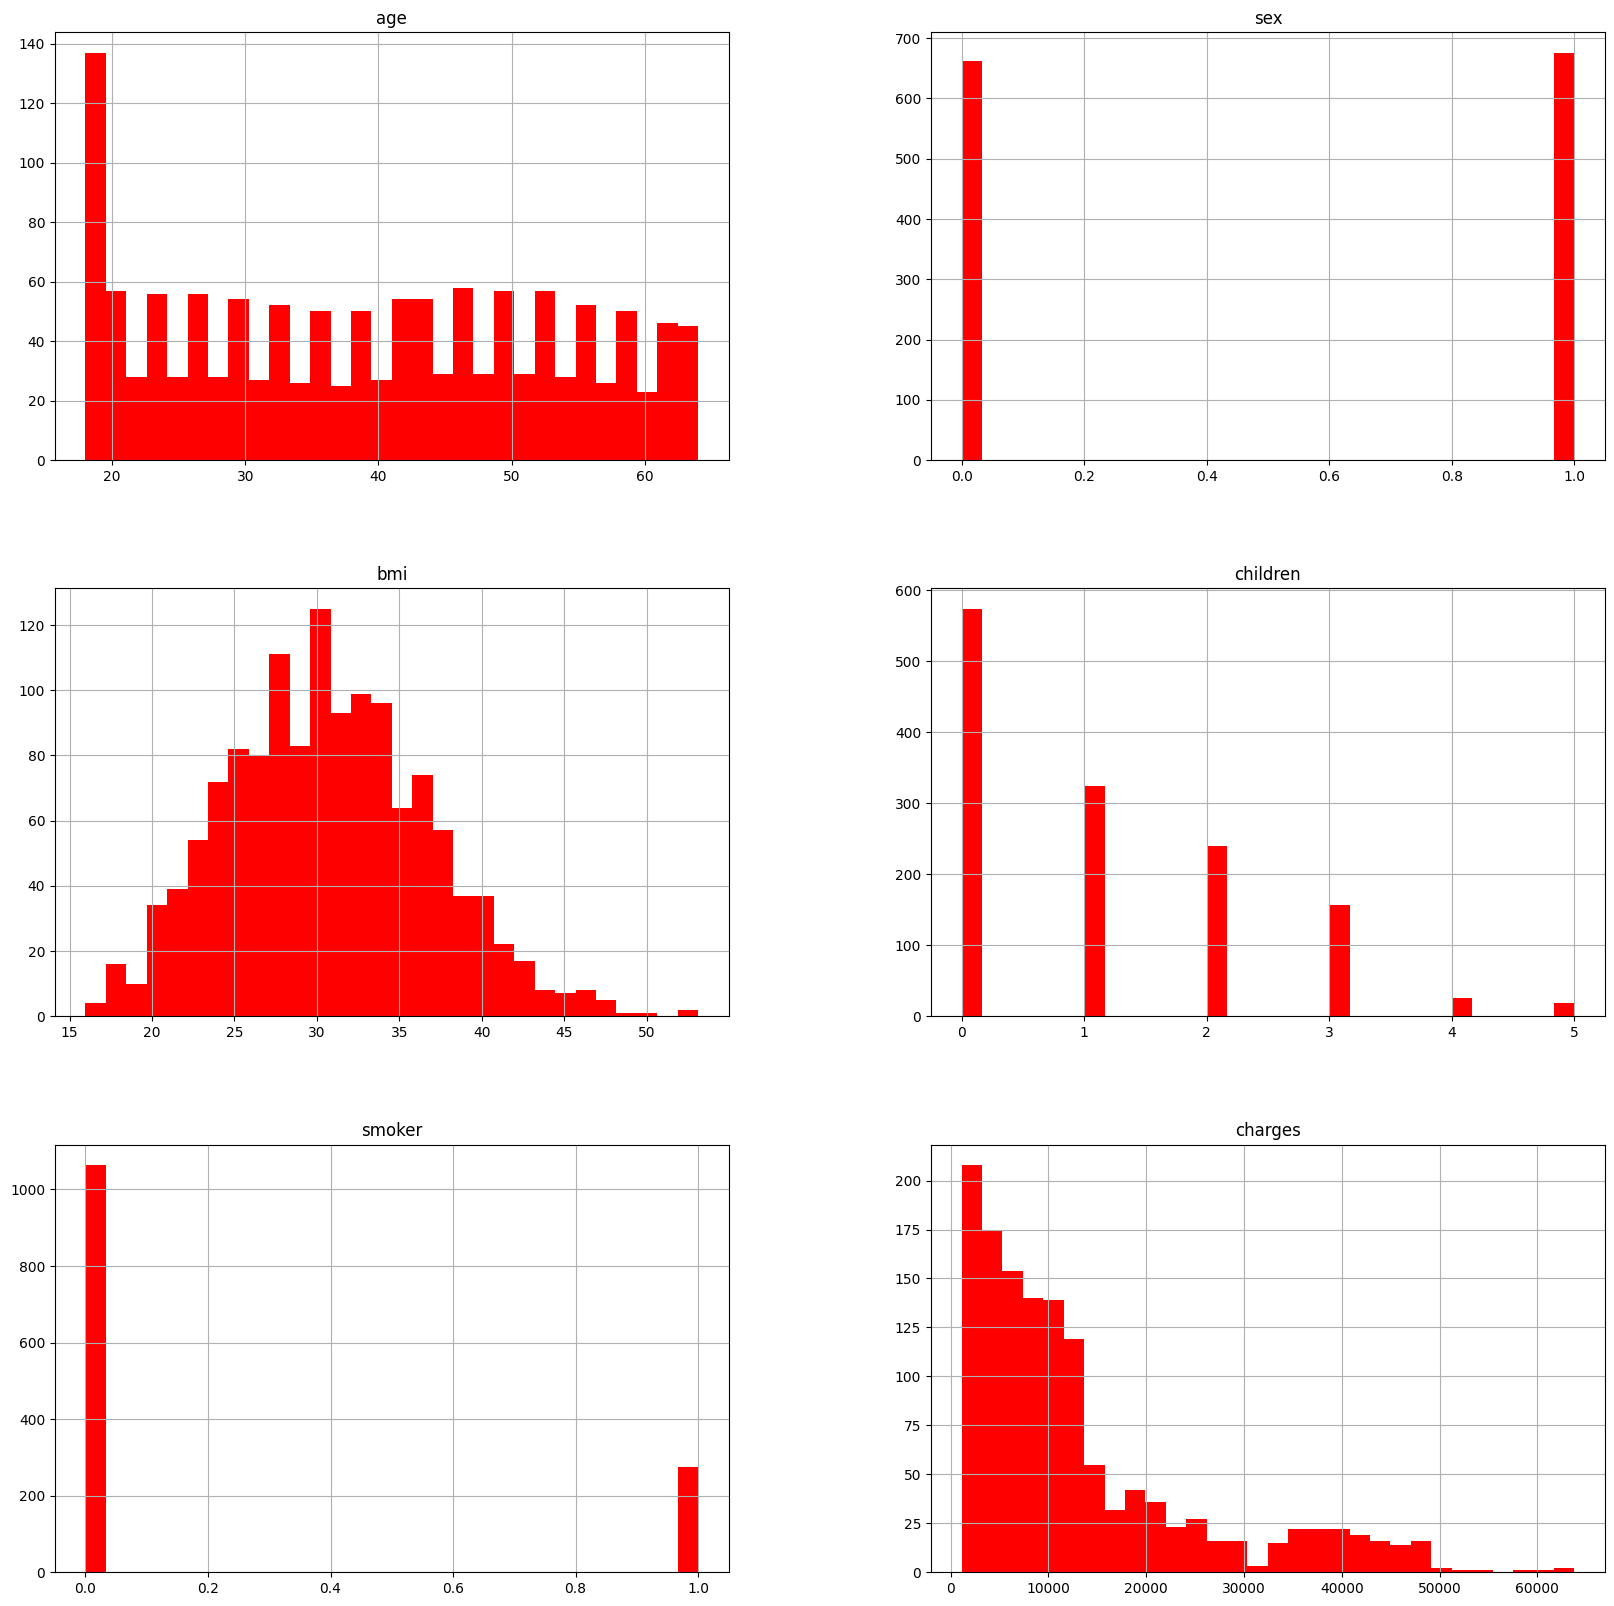

In [27]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')


In [ ]:
# plot pairplot

sns.pairplot(insurance_df)

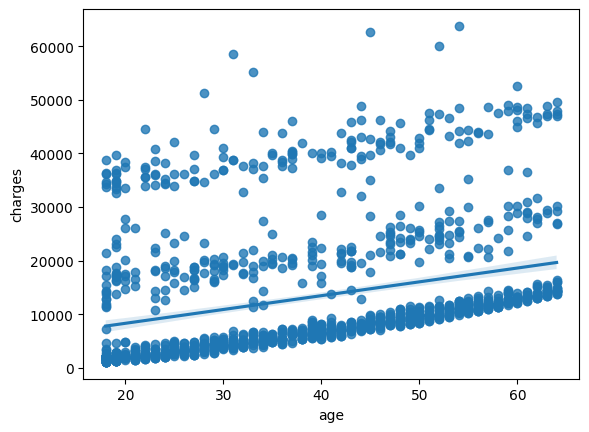

In [28]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


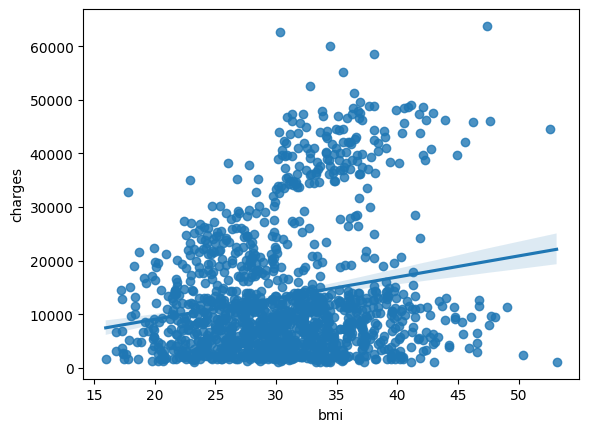

In [29]:
#Obtain the regplot between bmi and charges
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


In [30]:
#Calculate and plot the correlation matrix
corr = insurance_df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

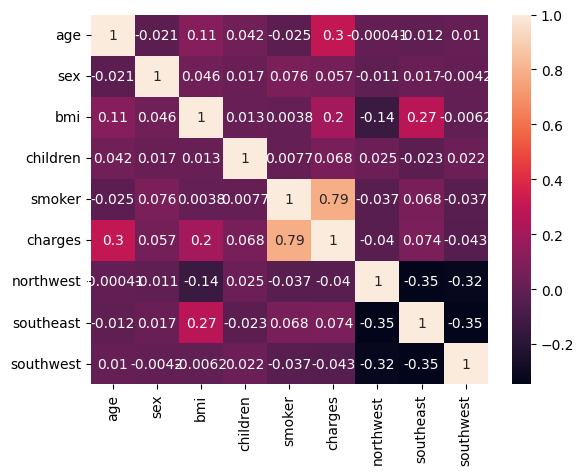

In [31]:
sns.heatmap(corr, annot=True)
# smoker and age have positive correlations with charges

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [32]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [33]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']


In [34]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [35]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
X.shape

(1338, 8)

In [37]:
y.shape

(1338,)

In [38]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [39]:
y = y.reshape(-1,1)

In [40]:
# Only take the numerical variables and scale them
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [42]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [43]:
#Split the data into 20% Testing and 80% Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
X_train.shape

(1070, 8)

In [45]:
X_test.shape

(268, 8)

# TASK #6: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [46]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [47]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7812464704592355

In [48]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [51]:
y_predict

array([[14564.363  ],
       [26952.18   ],
       [ 3410.3223 ],
       [10153.883  ],
       [ 7268.9766 ],
       [33946.27   ],
       [10324.895  ],
       [12046.82   ],
       [36271.8    ],
       [29119.613  ],
       [31662.969  ],
       [12429.227  ],
       [14330.078  ],
       [38544.08   ],
       [36376.723  ],
       [ 9441.861  ],
       [ 9067.061  ],
       [ 2174.9668 ],
       [14800.342  ],
       [36870.324  ],
       [ 2508.9727 ],
       [11675.658  ],
       [ 7244.424  ],
       [ 8245.406  ],
       [36732.79   ],
       [11907.863  ],
       [26950.945  ],
       [ 7067.3906 ],
       [16200.455  ],
       [34106.09   ],
       [27737.309  ],
       [ 7911.1016 ],
       [ 7693.717  ],
       [ 7218.5703 ],
       [31033.246  ],
       [35659.605  ],
       [13477.418  ],
       [ 8724.973  ],
       [ 5510.84   ],
       [33877.668  ],
       [10061.543  ],
       [ 3002.207  ],
       [  144.8252 ],
       [  566.82227],
       [ 5301.8867 ],
       [29

In [49]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [50]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)


In [53]:
#calculate the mean absolute error, R2 and adjusted R2
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [54]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 69428736.0 
MSE = 4820349000000000.0 
MAE = 47559470.0 
R2 = 0.7812464571653938 
Adjusted R2 = 0.7744895909774523


# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [ ]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance.
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3).
role = sagemaker.get_execution_role()
print(role)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_train = y_train[:,0]

In [ ]:
y_train.shape

In [ ]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O).
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
buf.seek(0)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero


In [ ]:
import os

# Code to upload RecordIO data to S3

# Key refers to the name of the file
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

In [ ]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training
# output path and sagemaker session into the Estimator.
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role,
                                       train_instance_count = 1,
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 50,
                           num_models = 35,
                           loss = 'squared_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL

In [ ]:
# Deploying the model to perform inference

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [ ]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [ ]:
result # results are in Json format

In [ ]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [ ]:
predictions

In [ ]:
predictions.shape

In [ ]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

In [ ]:
# Delete the end-point

linear_regressor.delete_endpoint()